# Image processing - Superpythontalks
### by Joe Donovan


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#Jupyter "magic" command for inline plots
%matplotlib inline 
%config InlineBackend.figure_format='svg'

%autosave 180

Autosaving every 180 seconds


[[  0  55]
 [255 128]]


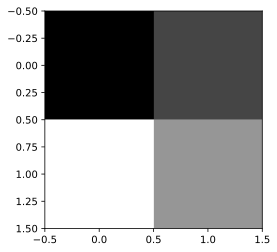

In [42]:
#Create a simple image
img = np.array() #fill this in!
plt.imshow(img, interpolation="nearest", cmap=plt.cm.Greys_r)


## What is an image?

Some numbers in an array representation over several dimensions  

Ok - What’s a dimension?   
Axis over which the array changes

### Some examples

BW pic – 2D (x, y)

Color picture 3D (x, y, color)


In [1]:
from skimage import io
p_img = io.imread("python-powered-h-140x182.png")
print ("Dimensions: ", p_img.ndim)
print ("Shape: ", p_img.shape)
gs = GridSpec(1, p_img.shape[-1])
cmaps = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Greys_r]
labels = ["R", "G", "B", "A"]
for dim in range(p_img.shape[-1]):
    ax = plt.subplot(gs[dim])
    
    #plot each color of the image!

Dimensions:  3
Shape:  (182, 140, 4)


NameError: name 'GridSpec' is not defined

Color movie: **4D** (time, x, y, color)

One-color volume (3D) time-series: **4D** (time, x, y, z)

Multi-color volume (3D) time-series **5D** (time, x, y, z, color)

## Types of numbers

* int - integers     
        0, 1, 2, 3, etc.
* float - floating point   
        6.022140857 × 10**23
![Floats](ae814346939ac31086e1d0286c41d98e6b053102.svg)

### Signed/unsigned integers
    Signed ints can be + or -
    Unsinged ints are only positive (but can be twice as large as signed ints for a given size)
    
### Bits 
For floats
    determines the precision

For ints
    Determines the maximum size
    Generally powers of two (8, 16, 32, 64)

    
### Integer overflow
Imagine you have a 8-bit unsigned integer.  
It can store a number between 0 to 255 - let's say it stores 250 right now.
What happen happens when you add 10 to it?

In [4]:
arr = np.asarray([250], dtype=np.uint8)
print ("Before: ", arr)
arr = arr + 10
print ("After adding 10: ", arr)

Before:  [250]
After adding 10:  [4]


## Loading/saving

skimage.data provides some included examples

### Formats
jpg - Common compressed image format  
bmp - raw and uncompressed  
png - Losslessly compressed format   
tif - Common microscopy format   
And other specialized formats (mention how to open)  


## Colors
**How is color encoded in a file?  **  
Color format:  
RGB, RGBA, BGR, CMYK, HSV, Lab 

Colorspaces - gets even a little more complicated  
A colorspace (ie sRGB or AdobeRGB) says how red is your red and how green is your green? 

## Image manipulation

How to change contrast and brightness? 

Wait - first - how to look at an image's brightness?  
Histograms

(512, 512, 3)
(262144, 3)


(-12.75, 267.75, 0.0, 14746.200000000001)

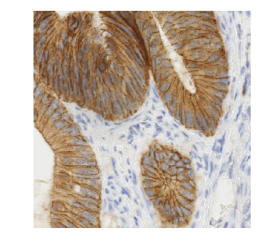

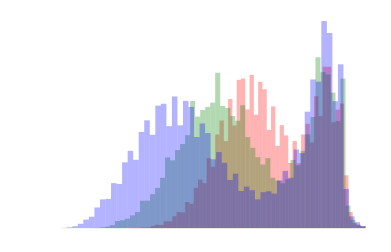

In [37]:
from skimage import data
p_img = data.immunohistochemistry()

print(p_img.shape)
plt.imshow(p_img)
plt.axis('off')
plt.figure()

#make a histogram of the image intensity

29 158


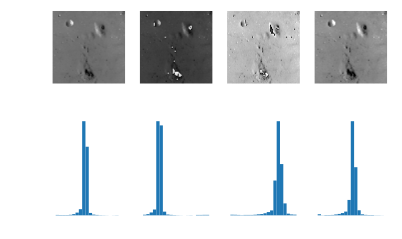

In [82]:
from skimage import exposure

base_img = data.moon()

#play around with image contrast 

imgs = [base_img,] #add some images here
gs = GridSpec(2, len(imgs))
for i, img in enumerate(imgs):
    vmin, vmax = 0, 255
    plt.subplot(gs[0, i])
    plt.imshow(img, vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.subplot(gs[1, i])
    plt.hist(img.ravel(), bins=20, range=[vmin, vmax])
    plt.axis('off')



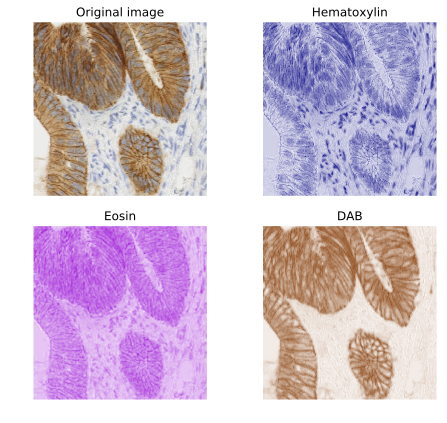

In [16]:
#Example from skimage: http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html#sphx-glr-auto-examples-color-exposure-plot-ihc-color-separation-py
    
from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the orginal one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])

ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

### Spatial filtering
Smoothing, denoising, sharpening etc.

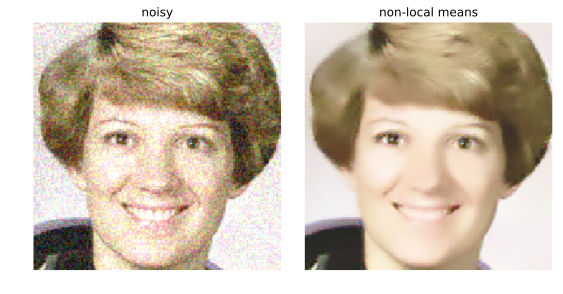

In [10]:
#From skimage examples:  http://scikit-image.org/docs/dev/auto_examples/filters/plot_nonlocal_means.html 


from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means


astro = img_as_float(data.astronaut())
astro = astro[30:180, 150:300]

noisy = astro + 0.3 * np.random.random(astro.shape)
noisy = np.clip(noisy, 0, 1)

denoise = #Filter the image!

fig, ax = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})

ax[0].imshow(noisy)
ax[0].axis('off')
ax[0].set_title('noisy')
ax[1].imshow(denoise)
ax[1].axis('off')
ax[1].set_title('non-local means')

fig.tight_layout()

### Geometric transforms
What (real) size is an image?  

How to change?
Affine transformtions - Translation, rotation, scale, shear 



(512, 512, 3)
(307, 154, 3)


C:\Anaconda2\envs\py36\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


(-0.5, 153.5, 306.5, -0.5)

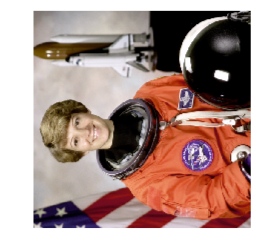

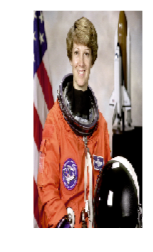

In [57]:
from skimage import transform, data
img = data.astronaut()

#Flip the image sideways and show it
plt.imshow()
plt.axis('off')
plt.figure()




### Binarization/thresholding
Turn a greyscale image into just black and white 

Why binarize?  
    Seperate objects
    Makes other operations easier  


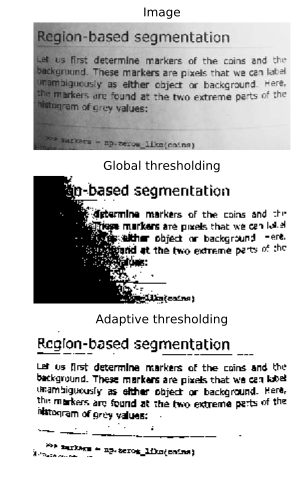

In [15]:
#from Skimage examples: http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html
from skimage import data
from skimage.filters import threshold_otsu, threshold_adaptive


image = data.page()

#Threshold the image

### Segmentation


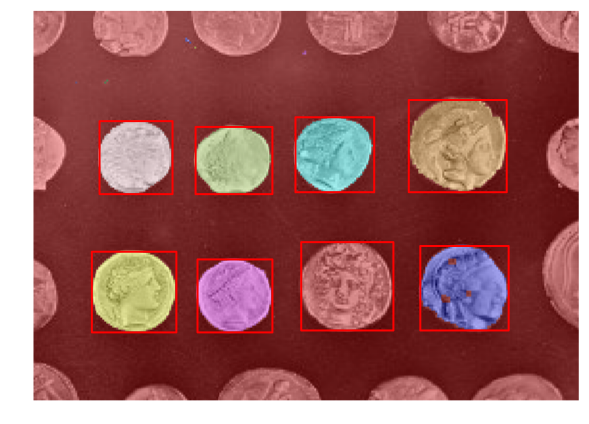

In [59]:
#from skimage examples - http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html#sphx-glr-auto-examples-segmentation-plot-label-py
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()


### Image alignment
Some options built into skimage, there are several approaches  
Can use Gohlke: http://www.lfd.uci.edu/~gohlke/code/imreg.py.html  
OpenCV: http://www.learnopencv.com/image-alignment-ecc-in-opencv-c-python/  
or others 

Registration points can be very useful

Known offset (y, x): (-74.4, 13.32)
Detected pixel offset (y, x): [ 74. -13.]


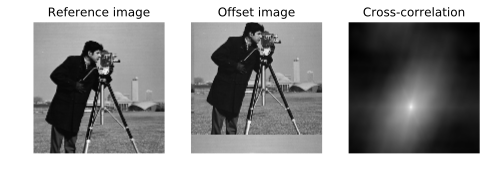

In [64]:
#from skimage examples http://scikit-image.org/docs/dev/auto_examples/transform/plot_register_translation.html#sphx-glr-auto-examples-transform-plot-register-translation-py

from skimage import data
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft
from scipy.ndimage import fourier_shift

image = data.camera()
shift = (-74.4, 13.32)
# The shift corresponds to the pixel offset relative to the reference image
offset_image = fourier_shift(np.fft.fftn(image), shift)
offset_image = np.fft.ifftn(offset_image)
print("Known offset (y, x): {}".format(shift))

# pixel precision first
shift, error, diffphase = register_translation(image, offset_image)

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(image, cmap='gray')
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Offset image')

# Show the output of a cross-correlation to show what the algorithm is
# doing behind the scenes
image_product = np.fft.fft2(image) * np.fft.fft2(offset_image).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Cross-correlation")

print("Detected pixel offset (y, x): {}".format(shift))


## Interactive example - pyqtgraph

In [ ]:
import pyqtgraph.examples
pyqtgraph.examples.run()